In [2]:
import os
import sys
from hydra import compose, initialize
from matplotlib import pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.eval import evaluate

In [13]:
ckpt_path = "/home/yl241/models/Multi-Annotators/clipseg_debris_weight.ckpt"
input_dir = "/home/yl241/data/HIDeAI/predict_highres/"
prediction_parent_dir = "/home/yl241/experiments/fCLIPSeg"
output_dir_name = "visualize_prediction"
device = '[0]' # using cuda 0

# running on CUDA 0
with initialize(version_base=None, config_path="../configs", job_name="test_app"):
    cfg = compose(
        config_name="eval",
        overrides=[f"trainer.devices={device}",
                   f"name={output_dir_name}",
                   f"ckpt_path={ckpt_path}",
                   f"data.query_images_dir={input_dir}",
                   f"+local.prediction_output_dir={prediction_parent_dir}"
                   ])

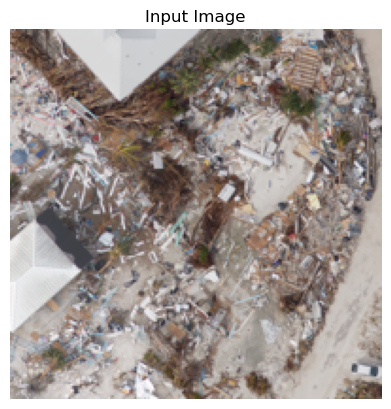

In [11]:
# visualize input image
files = os.listdir(input_dir)
if len(files) > 0:
    img_path = os.path.join(input_dir, files[0])
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()
else:
    print("No images found in the input directory.")

In [14]:
evaluate(cfg);

Seed set to 42
[rank: 0] No logger configs found! Skipping...
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100-SXM4-80GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Restoring states from the checkpoint path at /home/yl241/models/Multi-Annotators/clipseg_debris_weight.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]
Loaded model weights from the checkpoint at /home/yl241/models/Multi-Annotators/clipseg_debris_weight.ckpt
/home/yl241/etc/miniconda3/envs/samgeo/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:424: The 'predict_dataloader' does not have many workers which may

Predicting: |                                                                                                 …

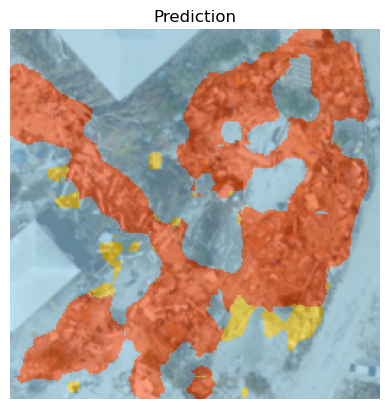

In [10]:
# visualize prediction
prediction_dir = os.path.join(prediction_parent_dir, output_dir_name, 'predictions')
files = os.listdir(prediction_dir)
if len(files) > 0:
    pred_path = os.path.join(prediction_dir, files[0])
    pred = plt.imread(pred_path)
    plt.imshow(pred)
    plt.axis('off')
    plt.title("Prediction")
    plt.show()
else:
    print("No prediction images found in the output directory.")